In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d elemento/nyc-yellow-taxi-trip-data --unzip

Dataset URL: https://www.kaggle.com/datasets/elemento/nyc-yellow-taxi-trip-data
License(s): U.S. Government Works


In [2]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

### **Import the Data**

In [4]:
# paths for the three dfs

df_jan_path = "/content/yellow_tripdata_2016-01.csv"
df_feb_path = "/content/yellow_tripdata_2016-01.csv"
df_mar_path = "/content/yellow_tripdata_2016-01.csv"

# load the dataframes

df_jan = dd.read_csv(df_jan_path, assume_missing=True)
df_feb = dd.read_csv(df_feb_path, assume_missing=True)
df_mar = dd.read_csv(df_mar_path, assume_missing=True)

In [5]:
# print

df_jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
npartitions=26,,,,,,,,,,,,,,,,,,,
,float64,string,string,float64,float64,float64,float64,float64,string,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


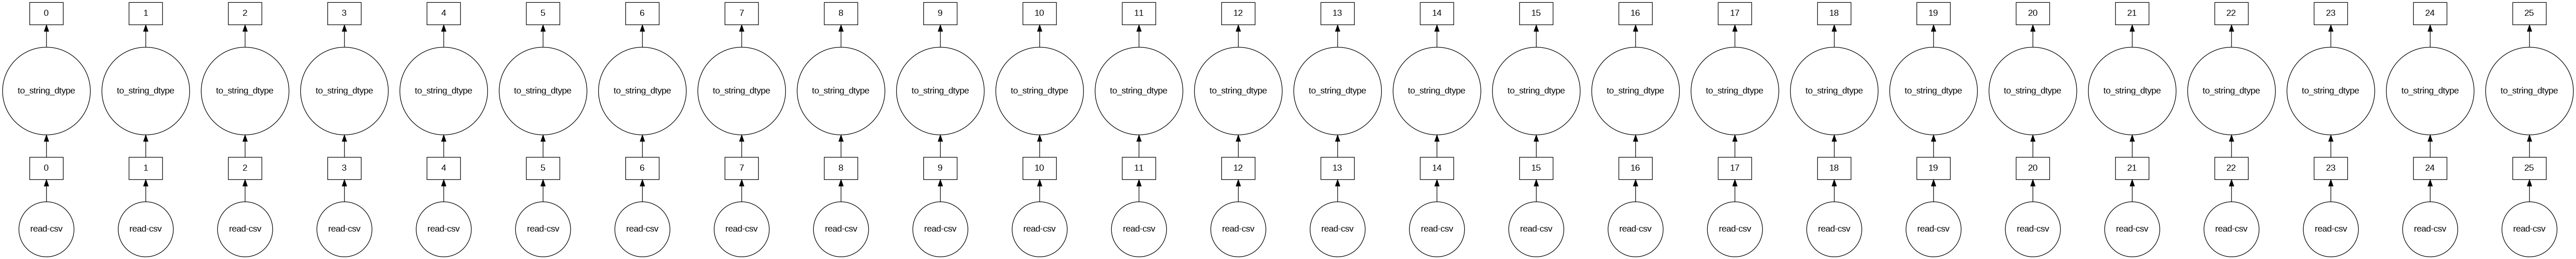

In [13]:
# visualize the chunks using the task graph

df_jan.visualize(tasks=True)

In [14]:
# shape of all the three datasets

print("Shape of january dataset", df_jan.shape)
print("Shape of february dataset", df_feb.shape)
print("Shape of march dataset", df_mar.shape)

Shape of january dataset (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(2dd432b)).size() // 19, dtype=int64>, 19)
Shape of february dataset (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(2dd432b)).size() // 19, dtype=int64>, 19)
Shape of march dataset (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(2dd432b)).size() // 19, dtype=int64>, 19)


In [15]:
# We can concat the three dataframes as the number of columns are same in all the three dfs

# concat the three dataframes as one

df_final = dd.concat([df_jan, df_feb, df_mar], axis=0).drop(columns=['extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'payment_type'])

In [16]:
df_final

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount
npartitions=78,,,,,,,,,,,,
,float64,string,string,float64,float64,float64,float64,float64,string,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...


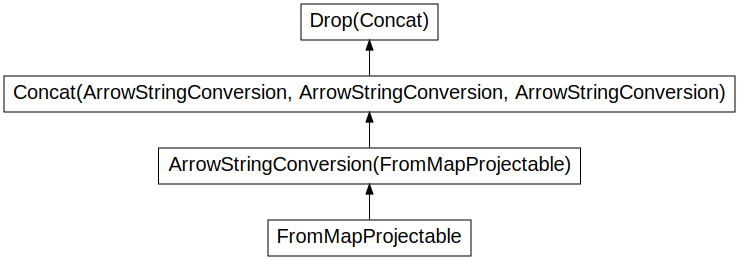

In [17]:
# visulaize the concatenation

df_final.visualize()

In [18]:
# columns in the final dataset

df_final.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount'],
      dtype='object')

In [19]:
# print top ten rows

df_final.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount
0,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,2.0,1.10,-73.990372,40.734695,1.0,N,-73.981842,40.732407,7.5
1,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,5.0,4.90,-73.980782,40.729912,1.0,N,-73.944473,40.716679,18.0
2,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,10.54,-73.984550,40.679565,1.0,N,-73.950272,40.788925,33.0
3,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,4.75,-73.993469,40.718990,1.0,N,-73.962242,40.657333,16.5
4,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,3.0,1.76,-73.960625,40.781330,1.0,N,-73.977264,40.758514,8.0
5,2.0,2016-01-01 00:00:00,2016-01-01 00:18:30,2.0,5.52,-73.980118,40.743050,1.0,N,-73.913490,40.763142,19.0
6,2.0,2016-01-01 00:00:00,2016-01-01 00:26:45,2.0,7.45,-73.994057,40.719990,1.0,N,-73.966362,40.789871,26.0
7,1.0,2016-01-01 00:00:01,2016-01-01 00:11:55,1.0,1.20,-73.979424,40.744614,1.0,N,-73.992035,40.753944,9.0
8,1.0,2016-01-01 00:00:02,2016-01-01 00:11:14,1.0,6.00,-73.947151,40.791046,1.0,N,-73.920769,40.865578,18.0
9,2.0,2016-01-01 00:00:02,2016-01-01 00:11:08,1.0,3.21,-73.998344,40.723896,1.0,N,-73.995850,40.688400,11.5


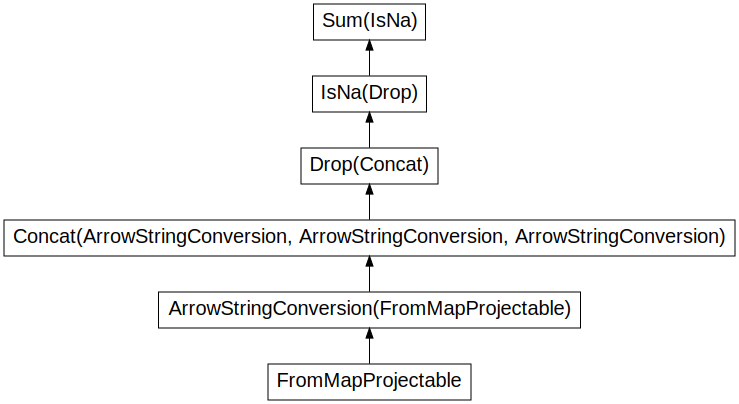

In [20]:
df_final.isna().sum().visualize()

In [21]:
# check for missing values in the data

df_final.isna().sum().compute()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
pickup_longitude,0
pickup_latitude,0
RatecodeID,0
store_and_fwd_flag,0
dropoff_longitude,0


There are no missing values in the data

In [23]:
# datatypes

df_final.dtypes

,0
VendorID,float64
tpep_pickup_datetime,string[pyarrow]
tpep_dropoff_datetime,string[pyarrow]
passenger_count,float64
trip_distance,float64
pickup_longitude,float64
pickup_latitude,float64
RatecodeID,float64
store_and_fwd_flag,string[pyarrow]
dropoff_longitude,float64


## **Analysis**

In [24]:
sns.set_style("whitegrid")

In [26]:
# statistical summary of numerical columns.

df_final.describe().compute()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,fare_amount
count,3.272057e+07,3.272057e+07,3.272057e+07,3.272057e+07,3.272057e+07,3.272057e+07,3.272057e+07,3.272057e+07,3.272057e+07
mean,1.535024e+00,1.670847e+00,4.648197e+00,-7.281869e+01,4.011494e+01,1.039350e+00,-7.288659e+01,4.015315e+01,1.248693e+01
std,4.987718e-01,1.324891e+00,2.981095e+03,9.168964e+00,5.051022e+00,5.186309e-01,8.900841e+00,4.903456e+00,3.556400e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.219343e+02,0.000000e+00,1.000000e+00,-1.219335e+02,0.000000e+00,-9.576000e+02
25%,1.000000e+00,1.000000e+00,1.100000e+00,-7.399062e+01,4.073968e+01,1.000000e+00,-7.399009e+01,4.073903e+01,7.000000e+00
50%,2.000000e+00,1.000000e+00,1.930000e+00,-7.397945e+01,4.075607e+01,1.000000e+00,-7.397832e+01,4.075607e+01,1.000000e+01
75%,2.000000e+00,2.000000e+00,3.800000e+00,-7.396252e+01,4.076970e+01,1.000000e+00,-7.395599e+01,4.077128e+01,1.550000e+01
max,2.000000e+00,9.000000e+00,8.000010e+06,0.000000e+00,6.090876e+01,9.900000e+01,0.000000e+00,6.090876e+01,1.112709e+05


## **Vendor ID**

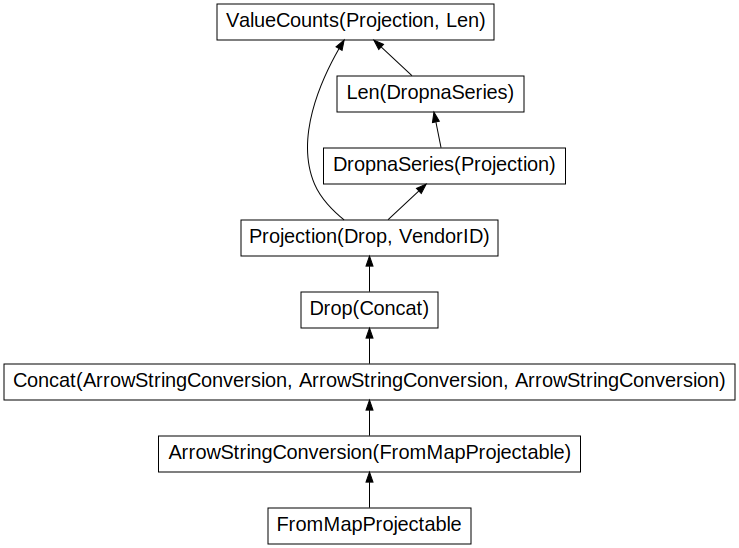

In [28]:
df_final["VendorID"].value_counts(normalize=True).visualize()

In [29]:
# Pie Char of Vendor share in NYC.

vendor_share = df_final["VendorID"].value_counts(normalize=True).compute()

In [30]:
vendor_share

,proportion
VendorID,
2.0,0.535024
1.0,0.464976


In [31]:
type(vendor_share)

pandas.core.series.Series

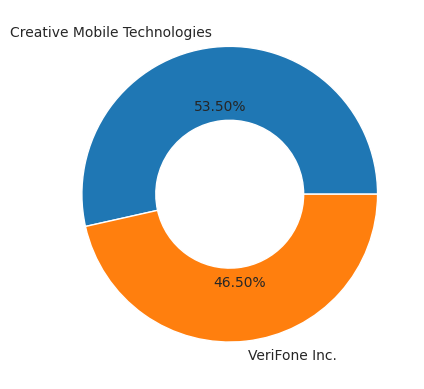

In [32]:
plt.pie(
    vendor_share,
    labels=["Creative Mobile Technologies","VeriFone Inc."],
    autopct="%.2f%%",
    radius=1,
    wedgeprops=dict(width=0.5, edgecolor="w")
)
plt.show()

## **Passenger Count**

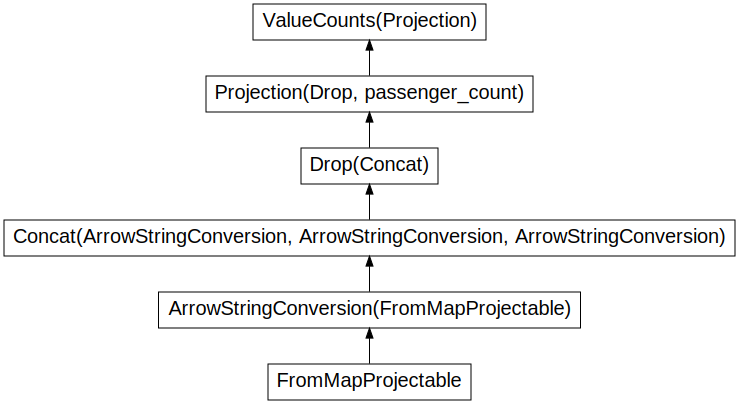

In [33]:
df_final["passenger_count"].value_counts().visualize()

In [34]:
# countplot for passenger plot.

passenger_count = df_final["passenger_count"].value_counts().compute()

In [35]:
passenger_count

,count
passenger_count,
3.0,1309293
7.0,66
2.0,4685931
1.0,23180952
0.0,1560
4.0,631923
9.0,69
8.0,78
5.0,1803237


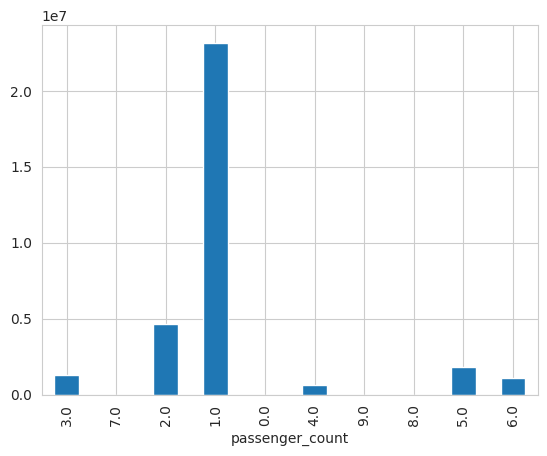

In [39]:
passenger_count.plot(kind="bar")
plt.show()

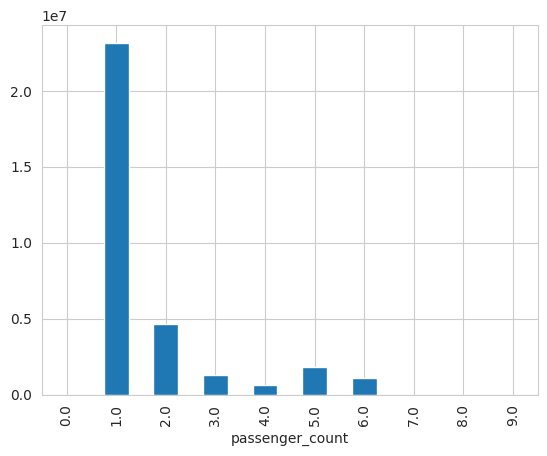

In [40]:
passenger_count.sort_index().plot(kind="bar")
plt.show()

Passenger count value outside the range of 1 to 5 passengers are erroneous and not allowed by the taxi commission in NYC

## **Trip Distance**

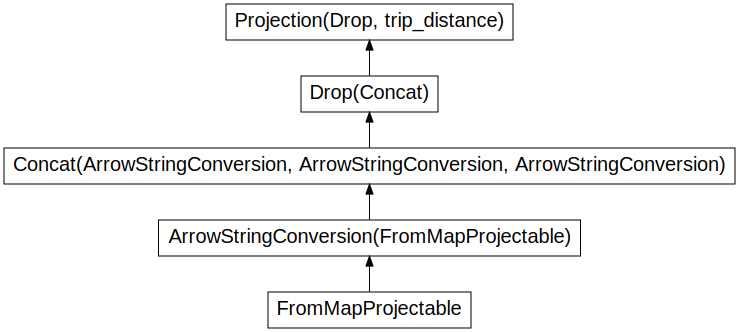

In [42]:
trip_distance = df_final.loc[:, "trip_distance"].visualize()
trip_distance

<Axes: ylabel='trip_distance'>

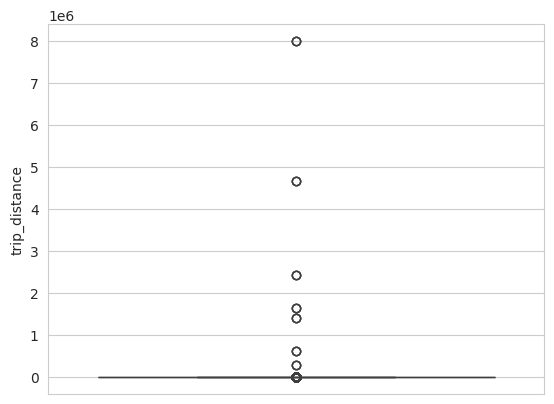

In [44]:
# Boxplot for the trip distance
trip_distance = df_final.loc[:, "trip_distance"]

sns.boxplot(trip_distance.compute())

In [45]:
df_final["trip_distance"]

Dask Series Structure:
npartitions=78
    float64
        ...
     ...   
        ...
        ...
Dask Name: getitem, 5 expressions
Expr=(Drop(frame=Concat(frames=[ArrowStringConversion(frame=FromMapProjectable(2dd432b)), ArrowStringConversion(frame=FromMapProjectable(2dd432b)), ArrowStringConversion(frame=FromMapProjectable(2dd432b))], ), columns=['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type']))['trip_distance']

In [48]:
percentile_values = np.arange(0.1, 1.0, 0.1) # start from 10 to 100 percentile with gap of 10 percentile.

print(percentile_values)

for percentile in percentile_values:
    print(f"The trip distance value for {int(percentile * 100)}th percentile is {df_final['trip_distance'].quantile(q=percentile).compute()}")

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
The trip distance value for 10th percentile is 0.7
The trip distance value for 20th percentile is 0.97
The trip distance value for 30th percentile is 1.23
The trip distance value for 40th percentile is 1.56
The trip distance value for 50th percentile is 1.93
The trip distance value for 60th percentile is 2.49
The trip distance value for 70th percentile is 3.27
The trip distance value for 80th percentile is 4.6
The trip distance value for 90th percentile is 7.6


In [49]:
# percentile values from 90th to 100th percentile.
percentile_values = np.arange(0.90, 1.01, 0.01) # start from 90th percentile to 100th percentile with a gap of 10th percentile.
print(percentile_values)

[0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]


In [50]:
percentile_values = np.arange(0.90,1.01,0.01)
percentile_values

for percentile in percentile_values:
    print(f"The trip distance value for {int(percentile * 100)}th percentile is {df_final['trip_distance'].quantile(q=percentile).compute()}")

The trip distance value for 90th percentile is 7.6
The trip distance value for 91th percentile is 8.18
The trip distance value for 92th percentile is 8.9
The trip distance value for 93th percentile is 9.6
The trip distance value for 94th percentile is 10.4
The trip distance value for 95th percentile is 11.44
The trip distance value for 96th percentile is 13.21
The trip distance value for 97th percentile is 16.47
The trip distance value for 98th percentile is 17.8
The trip distance value for 99th percentile is 19.238400000000254
The trip distance value for 100th percentile is 8000010.0


## **Fare Amount**

<Axes: ylabel='fare_amount'>

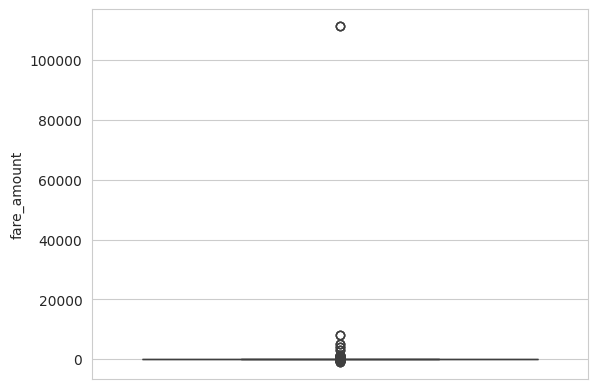

In [52]:
# boxplot for the fare amount

sns.boxplot(df_final.loc[:,"fare_amount"].compute())

In [53]:
# percentile values for fare amount from 10th percentile to 100th percentile.

percentile_values = np.arange(0.1,1.1,0.1)
print(percentile_values)

for percentile in percentile_values:
    print(f"The fare amount value for {int(percentile * 100)}th percentile is {df_final['fare_amount'].quantile(q=percentile).compute()}")

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
The fare amount value for 10th percentile is 5.0
The fare amount value for 20th percentile is 6.0
The fare amount value for 30th percentile is 7.5
The fare amount value for 40th percentile is 8.5
The fare amount value for 50th percentile is 10.0
The fare amount value for 60th percentile is 11.5
The fare amount value for 70th percentile is 14.0
The fare amount value for 80th percentile is 17.5
The fare amount value for 90th percentile is 25.5
The fare amount value for 100th percentile is 111270.85


In [54]:
# Percentile value from 90th percentile to 100th percentile.
percentile_values = np.arange(0.90,1.01,0.01)
print(percentile_values)

for percentile in percentile_values:
    print(f"The fare amount value for {int(percentile * 100)}th percentile is {df_final['fare_amount'].quantile(q=percentile).compute()}")

[0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]
The fare amount value for 90th percentile is 25.5
The fare amount value for 91th percentile is 27.5
The fare amount value for 92th percentile is 29.0
The fare amount value for 93th percentile is 31.5
The fare amount value for 94th percentile is 34.5
The fare amount value for 95th percentile is 38.5
The fare amount value for 96th percentile is 45.0
The fare amount value for 97th percentile is 52.0
The fare amount value for 98th percentile is 52.0
The fare amount value for 99th percentile is 52.0
The fare amount value for 100th percentile is 111270.85


## **RateCode ID**

In [55]:
# unique values

rate_code_ids = df_final.loc[:, "RatecodeID"].value_counts().compute()
rate_code_ids

,count
RatecodeID,
3.0,50466
2.0,675057
1.0,31878945
99.0,648
4.0,14088
5.0,101064
6.0,306


In [57]:
rate_code_ids.sort_index()

,count
RatecodeID,
1.0,31878945
2.0,675057
3.0,50466
4.0,14088
5.0,101064
6.0,306
99.0,648


In [59]:
# Unique values in rate code columns.
print(rate_code_ids.sort_index().index.tolist())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 99.0]


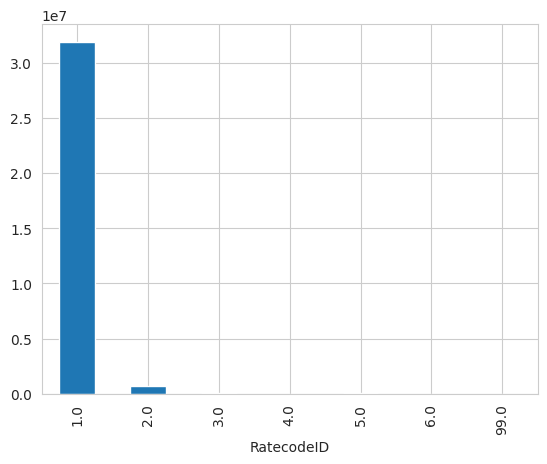

In [60]:
# plot the bar plot to display the distribution of categories

rate_code_ids.sort_index().plot(kind="bar")
plt.show()

Missing values category is replaced by 99

## **Location Based Columns**

In [68]:
# make a subset of location based columns

location_subset = df_final[[
    'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'
]]
location_subset

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
npartitions=78,,,,
,float64,float64,float64,float64
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


In [67]:
# location_subset = df_final[[
#     'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'
# ]].compute()
# location_subset

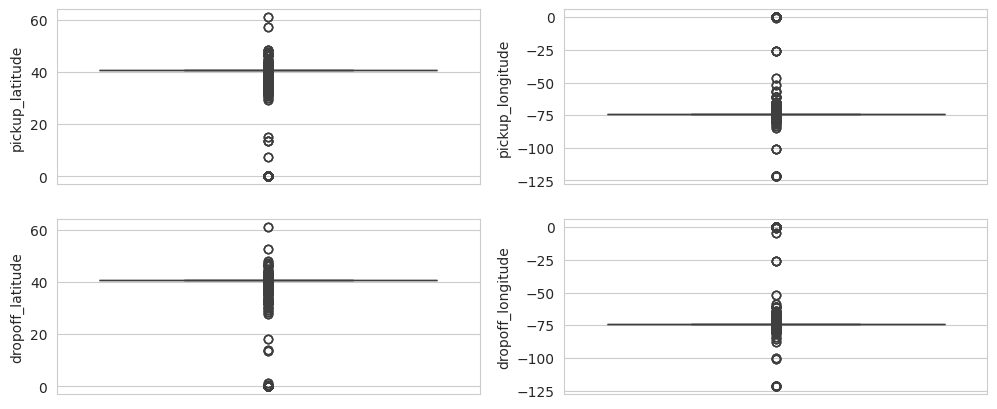

In [69]:
# boxplots for location based columns

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(12,5))
for i in range(4):
    if i <= 1:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax1[i])
    else:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax2[i - 2])

## **Store and Fwd Flag**

<Axes: xlabel='count', ylabel='store_and_fwd_flag'>

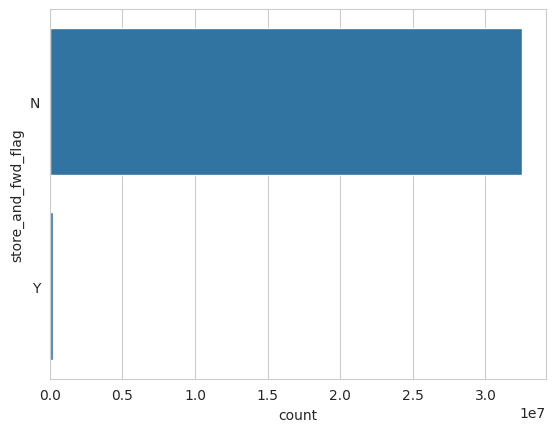

In [70]:
# countplot
store_fwd_flag = df_final["store_and_fwd_flag"].compute()
sns.countplot(store_fwd_flag)

## **Datetime Columns**

In [71]:
df_final.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount'],
      dtype='object')

In [80]:
# convert the columns to datetime

df_final["tpep_pickup_datetime"] = dd.to_datetime(df_final["tpep_pickup_datetime"], yearfirst=True, format="mixed")
df_final["tpep_dropoff_datetime"] = dd.to_datetime(df_final["tpep_dropoff_datetime"], yearfirst=True, format="mixed")

In [81]:
# create new columns

df_final["pickup_months"] = df_final["tpep_pickup_datetime"].dt.month
df_final["pickup_day_of_week"] = df_final["tpep_pickup_datetime"].dt.dayofweek
df_final["pickup_hour"] = df_final["tpep_pickup_datetime"].dt.hour

In [82]:
df_final.dtypes

,0
VendorID,float64
tpep_pickup_datetime,datetime64[ns]
tpep_dropoff_datetime,datetime64[ns]
passenger_count,float64
trip_distance,float64
pickup_longitude,float64
pickup_latitude,float64
RatecodeID,float64
store_and_fwd_flag,string[pyarrow]
dropoff_longitude,float64


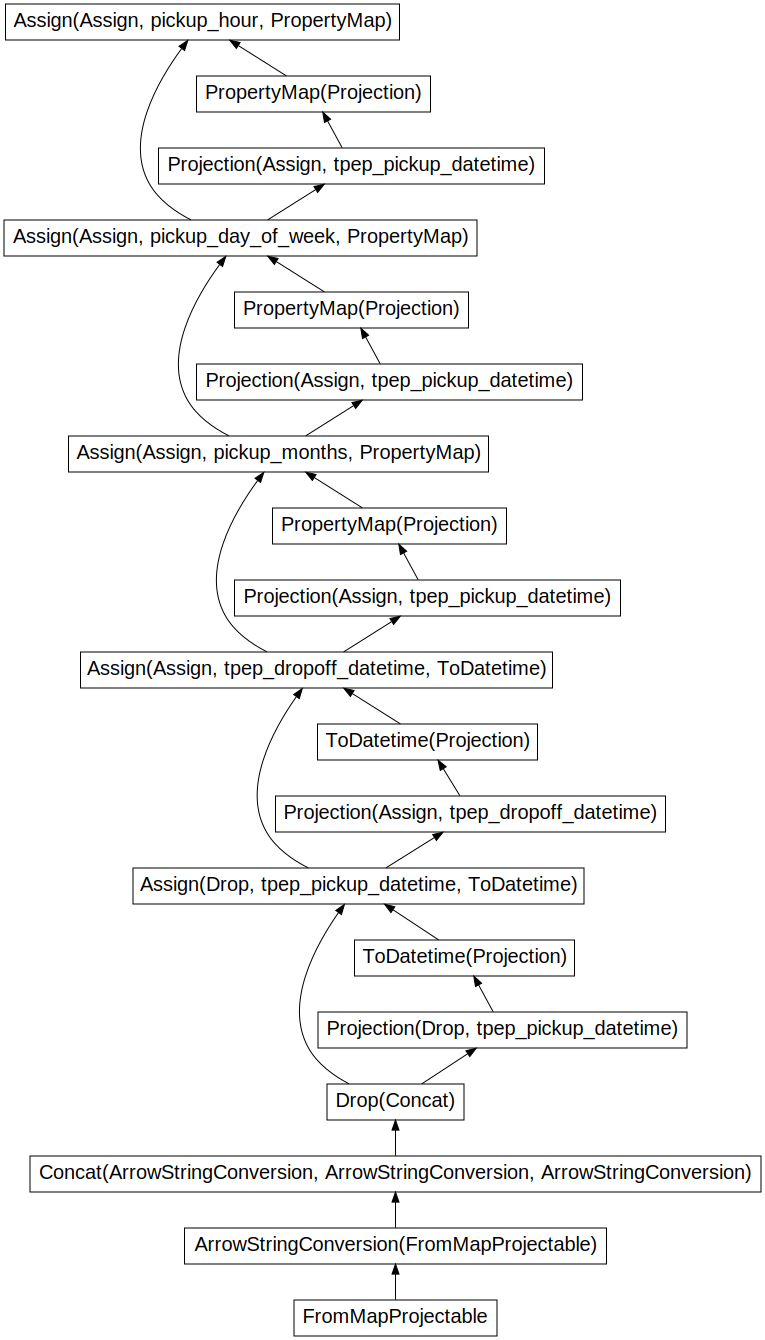

In [83]:
df_final.visualize()

In [93]:
# plot the number of pickups

pickups_every_3_days = (
                            df_final
                            .set_index('tpep_pickup_datetime')
                            .resample("3D")
                            .size()
                            .compute()
)

In [94]:
pickups_every_3_days

,0
tpep_pickup_datetime,
2016-01-01,2882238
2016-01-04,3023814
2016-01-07,3488367
2016-01-10,3185487
2016-01-13,3578556
2016-01-16,3397608
2016-01-19,3500838
2016-01-22,1974183
2016-01-25,2906766


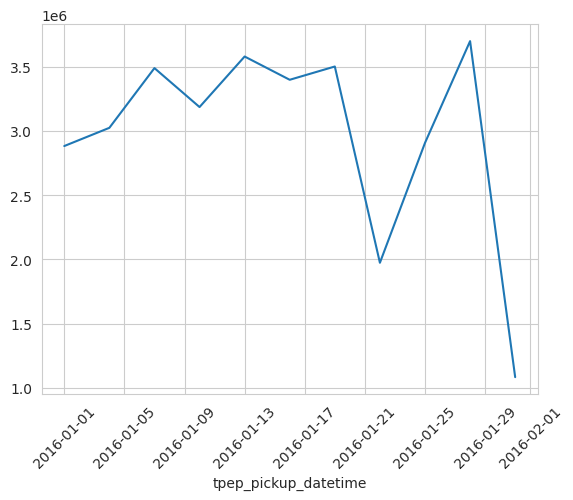

In [95]:
# plot the graph of pickups

sns.lineplot(pickups_every_3_days)
plt.xticks(rotation=45)
plt.show()

In [96]:
# pickups for each hour of the day.

pickups_each_hour = (
    df_final
    .groupby(["pickup_hour","pickup_day_of_week"])["VendorID"]
    .count()
    .compute()
)

In [92]:
pickups_each_hour

,,VendorID
pickup_hour,pickup_day_of_week,
1,4,186741
19,4,370344
9,6,140058
7,0,164565
8,0,201663
...,...,...
16,1,194091
20,1,265737
1,2,58260


In [97]:
pickups_each_hour = pickups_each_hour.reset_index()

In [98]:
pickups_each_hour

,pickup_hour,pickup_day_of_week,VendorID
0,1,4,186741
1,19,4,370344
2,9,6,140058
3,7,0,164565
4,8,0,201663
...,...,...,...
163,16,1,194091
164,20,1,265737
165,1,2,58260
166,5,3,45480


In [100]:
pickups_each_hour.rename(
    columns={
        "VendorID": "Number of Pickups"
    }, inplace=True
)

In [101]:
day_names = [
    "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"
]

replacement_mapper = {
    k:v for k, v in enumerate(day_names)
}

In [102]:
replacement_mapper

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [103]:
pickups_each_hour.replace({"pickup_day_of_week":replacement_mapper},inplace=True)

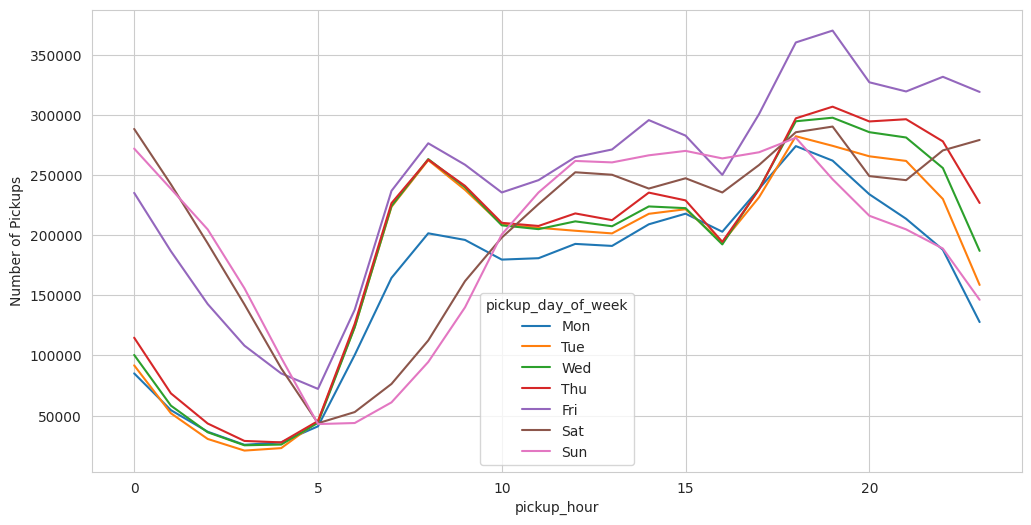

In [104]:
# plot the lineplot

fig = plt.figure(figsize=(12,6))

sns.lineplot(pickups_each_hour, x="pickup_hour", y="Number of Pickups",
             hue="pickup_day_of_week",hue_order=day_names)

plt.show()